## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
!nvidia-smi

Mon Jul 15 12:05:19 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8    26W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [0]:
train, test = keras.datasets.cifar10.load_data()

In [0]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [0]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [0]:
def build_mlp(input_shape, output_units = 10, num_neurons = [512,256,128]):
  input_layer = keras.layers.Input(input_shape)
  
  for i, n_units in enumerate(num_neurons):
    if i == 0 :
      x = keras.layers.Dense(units = n_units, activation = 'relu', name = 'hidden_layer' + str(i+1))(input_layer)
      
    else:
      x = keras.layers.Dense(units = n_units, activation = 'relu', name = 'hidden_layer' + str(i+1))(x)
      
  out =keras.layers.Dense(units = output_units, activation = 'softmax', name = 'output')(x)
  
  model = keras.models.Model(inputs = [input_layer], outputs = [out])
  return model

In [0]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 0.01
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.55,0.75,0.95,1.15,1.35]

In [9]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for m in MOMENTUM:
  keras.backend.clear_session() 
  print('Experiment with Momentum = %.6f' %(m))
  model = build_mlp(input_shape = x_train.shape[1:])
  model.summary()
  optimizer = keras.optimizers.SGD(lr = LEARNING_RATE, nesterov=True, momentum = m)
  model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = optimizer)
  
  model.fit(x_train, y_train,
           epochs = EPOCHS,
           batch_size = BATCH_SIZE,
           validation_data = (x_test, y_test),
           shuffle = True)
  
  # collect result
  train_loss = model.history.history['loss']
  valid_loss = model.history.history['val_loss']
  train_acc = model.history.history['acc']
  valid_acc = model.history.history['val_acc']
  
  exp_name_tag = 'exp-Momentum-%s' %str(m)
  results[exp_name_tag] = {'train-loss': train_loss,
                                      'valid-loss': valid_loss,
                                      'train-acc': train_acc,
                                      'valid-acc': valid_acc}

W0715 12:47:58.302978 139887417051008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0715 12:47:58.308696 139887417051008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



Experiment with Momentum = 0.550000


W0715 12:47:58.554452 139887417051008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 1,746,506
Trainable params: 1,746,506
Non-trainable params: 0
_________________________________________________________________


W0715 12:47:58.855649 139887417051008 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 176us/step - loss: 2.0144 - acc: 0.2798 - val_loss: 1.9992 - val_acc: 0.2689
Epoch 2/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.8208 - acc: 0.3517 - val_loss: 1.7906 - val_acc: 0.3545
Epoch 3/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.7404 - acc: 0.3812 - val_loss: 1.7005 - val_acc: 0.4040
Epoch 4/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.6870 - acc: 0.4016 - val_loss: 1.6620 - val_acc: 0.4110
Epoch 5/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.6422 - acc: 0.4163 - val_loss: 1.7289 - val_acc: 0.3703
Epoch 6/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.6046 - acc: 0.4314 - val_loss: 1.5964 - val_acc: 0.4347
Epoch 7/50
50000/50000 [==============================] - 4s 90us/step - loss: 1.5727 - acc: 0.4413 - val_loss: 1.6334 - val_ac

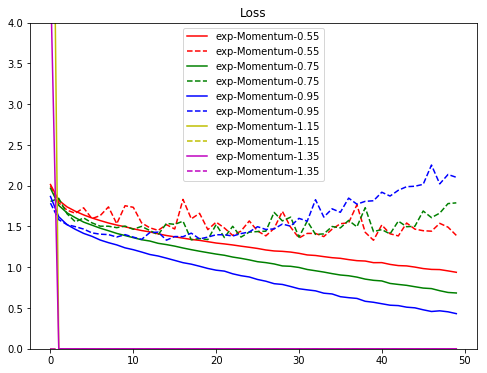

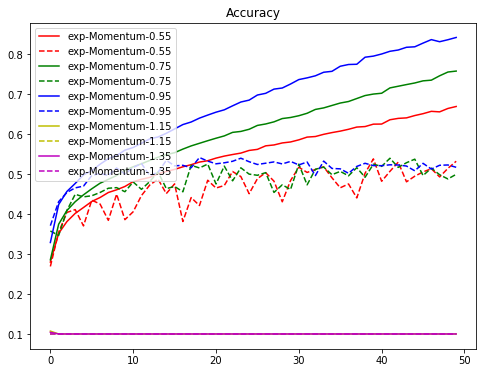

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ['r','g','b','y','m','k']
plt.figure(figsize = (8,6))
for i , cond in enumerate(results.keys()):
  plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'],'-',label = cond, color=color_bar[i])
  plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'],'--', label = cond, color = color_bar[i])
plt.title('Loss')
plt.ylim(0,4)
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()


### Too Large Momentum Harm The Result